## Example of how to load nifti files

# Imports

In [82]:
import JupyterNotebooksLib as slicernb

# Load nifti

In [83]:
# load nifiti volumes
ct = slicer.util.loadVolume('nifti/clin_pt1_000.nii.gz')

# segmentations
heart = slicer.util.loadLabelVolume('nifti/clin_pt1_Heart_000.nii.gz', properties = {'name': 'Heart'})
lungLeft = slicer.util.loadLabelVolume('nifti/clin_pt1_LungLeft_000.nii.gz', properties = {'name': 'Left Lung'} )

In [84]:
ct.GetImageData().GetDimensions()
heart.GetImageData().GetDimensions()

(256, 256, 199)

# Visualize slices

In [85]:
# Select CT as background and turn off foreground and labelmaps
slicer.util.setSliceViewerLayers(background=ct, foreground=None, label=None)

# Convert LabelMap into segmentation node 

In [86]:
organSegNode = slicer.mrmlScene.AddNewNodeByClass("vtkMRMLSegmentationNode")
slicer.modules.segmentations.logic().ImportLabelmapToSegmentationNode(heart, organSegNode)
slicer.modules.segmentations.logic().ImportLabelmapToSegmentationNode(lungLeft, organSegNode)

True

In [89]:
# change label map color of heart to red 
segmentation = organSegNode.GetSegmentation()
segment = segmentation.GetSegment('Heart')
segment.SetColor(1,0,0)
segment = segmentation.GetSegment('Left Lung')
segment.SetColor(0,0,1)

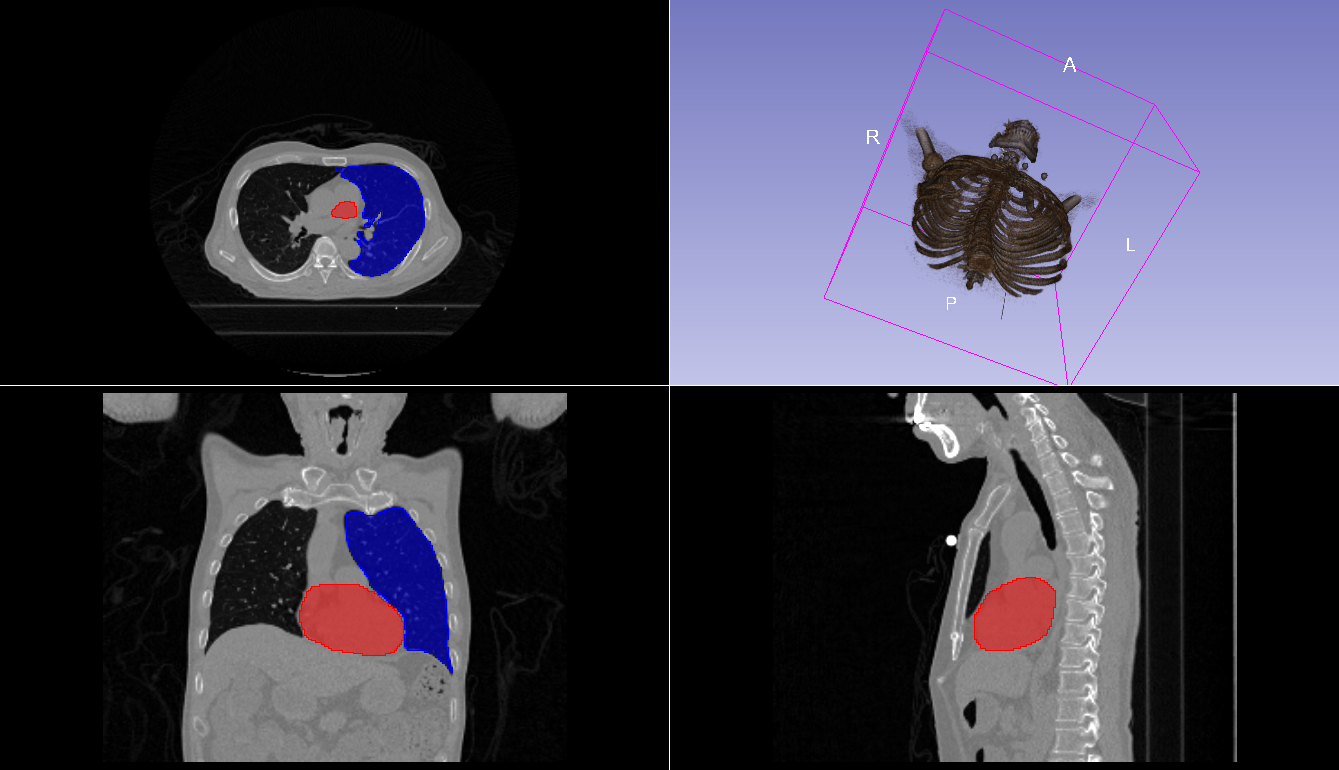

In [90]:
# Enable 3D volume rendering
slicernb.showVolumeRendering(ct)

# Show slice and 3D views
slicernb.ViewDisplay("FourUp")  # You can also try: FourUp, OneUpRedSlice, OneUp3D